## Trabajo práctico N5
### Modelos y Simulaciones - 2019
### Cátedra:

- Lic. Claudia López de Munain
- Lic. Bruno Alfredo Pazos

#### Integrantes:

- De Marco Andrada, Emiliano
- Perdomo, Luciano
- Serruya Aloisi, Luciano
- Toledo Margalef, Pablo

**1**. Suponga que tres amigos quieren cocinar tocino, huevos y tostadas para el desayuno de algunos visitantes del fin de semana. Ellos dividen el trabajo, con la preparación de un artículo por amigo. Se presenta la secuencia de las actividades con la ruta de acceso que representan las tareas para una persona de la siguiente manera

- Acceso superior
    - Inicio -> A
    - A -> B
    - B -> C
    - C -> Fin
- Acceso medio
    - Inicio -> D
    - D -> Fin
- Acceso inferior
    - Inicio -> E
    - E -> Fin
    
|Referencia       |Tarea                          |Demora                         |
|----------------|-------------------------------|-----------------------------|
|A|Romper huevos|U(2, 4)|
|B|Revolver huevos|U(3, 6)|
|C|Cocinar huevos|U(2, 5)|
|D|Hacer tostadas|U(3, 6)|
|E|Freir tocino|U(4, 14)|

In [1]:
import numpy as np
import seaborn as sns

In [2]:
MAX_EXPERIMENTOS=30
MAX_CORRIDAS=100
ACCESO_SUPERIOR="Acceso superior"
ACCESO_MEDIO="Acceso medio"
ACCESO_INFERIOR="Acceso inferior"

In [3]:
def get_confidence_interval(n, mean, std, z_value=1.96, std_mult=1):
    ci = z_value * ((std_mult * std) / (n ** 0.5))
    return mean+ci, mean-ci

In [5]:
contador_as = 0
contador_am = 0
contador_ai = 0
duracion_proyectos = []
duracion_proyectos_promedio_por_experimento = []
promedio_total = 0

for _ in range(MAX_EXPERIMENTOS):
    promedio_por_experimento = 0
    for _ in range(MAX_CORRIDAS):
        tarea_a = np.random.uniform(low=2, high=4)
        tarea_b = np.random.uniform(low=3, high=6)
        tarea_c = np.random.uniform(low=2, high=5)
        tarea_d = np.random.uniform(low=3, high=6)
        tarea_e = np.random.uniform(low=4, high=14)
        
        acceso_superior = (tarea_a, tarea_b, tarea_c)
        acceso_medio = (tarea_d,)
        acceso_inferior = (tarea_e,)
        
        proyecto = {
            ACCESO_SUPERIOR: acceso_superior,
            ACCESO_MEDIO: acceso_medio,
            ACCESO_INFERIOR: acceso_inferior
        }
        
        # La duración del proyecto es la suma del tiempo de demora de todas las tareas
        duracion_proyecto = sum(
            (sum(acceso) for acceso in (acceso_superior, acceso_medio, acceso_inferior))
        )
        
        promedio_por_experimento += duracion_proyecto
        duracion_proyectos.append(duracion_proyecto)
        
        # El camino crítico es la ruta de tareas que demoran más tiempo en realizarse
        camino_critico = max(proyecto, key=lambda acceso: sum(proyecto[acceso]))
        
        if camino_critico == ACCESO_SUPERIOR:
            contador_as += 1
            continue
        if camino_critico == ACCESO_MEDIO:
            contador_am += 1
            continue
        if camino_critico == ACCESO_INFERIOR:
            contador_ai += 1
            continue
    duracion_proyectos_promedio_por_experimento.append(promedio_por_experimento/MAX_CORRIDAS)

intervalo_confianza_max, intervalo_confianza_min = get_confidence_interval(
    len(duracion_proyectos), 
    np.mean(duracion_proyectos), 
    np.std(duracion_proyectos),
    z_value=2.57
)
print(f"El promedio muestral tiene un margen de error de [{intervalo_confianza_min}, {intervalo_confianza_max}] \
con respecto al promedio poblacional (99% de probabilidad)")
print(f"Porcentaje de criticidad en {MAX_EXPERIMENTOS} experimentos de {MAX_CORRIDAS} corridas cada uno")
print(f"Acceso superior => {(contador_as * 100) / (MAX_EXPERIMENTOS * MAX_CORRIDAS)}")
print(f"Acceso medio => {(contador_am * 100) / (MAX_EXPERIMENTOS * MAX_CORRIDAS)}")
print(f"Acceso inferior => {(contador_ai * 100) / (MAX_EXPERIMENTOS * MAX_CORRIDAS)}")

El promedio muestral tiene un margen de error de [24.253885254483116, 24.563342684319444] con respecto al promedio poblacional (99% de probabilidad)
Porcentaje de criticidad en 30 experimentos de 100 corridas cada uno
Acceso superior => 70.7
Acceso medio => 0.0
Acceso inferior => 29.3


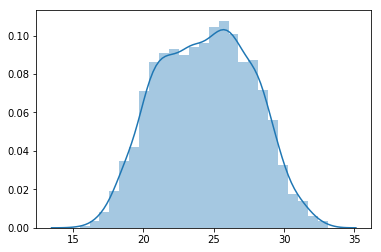

In [8]:
sns.distplot(duracion_proyectos)

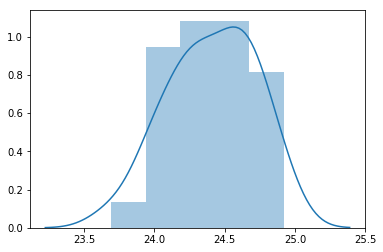

In [9]:
sns.distplot(duracion_proyectos_promedio_por_experimento)

**2**. Dos operarios de un lavadero de autos se dividen las tareas al momento de comenzar con un nuevo trabajo. La secuencia es la siguiente:

- Acceso superior
    - Inicio -> A
    - A -> B
    - B -> C
    - C -> Fin
- Acceso medio
    - A -> D
    - D -> E
    - E -> F
    - F -> Fin
- Acceso inferior
    - F -> G
    - G -> Fin
    
|Referencia       |Tarea                          |Demora                         |
|----------------|-------------------------------|-----------------------------|
|A|Retirar alfombras|U(1, 5)|
|B|Aplicar detergente|U(1, 3)|
|C|Enjuagar alfombras|U(1, 4)|
|D|Mojar vehículo|U(1, 6)|
|E|Aplicar detergente|U(6, 12)|
|E|Enjuagar vehículo|U(5, 10)|
|E|Aspirar interiores|U(10, 15)|

In [25]:
contador_as = 0
contador_am = 0
contador_ai = 0
duracion_proyectos = []
duracion_proyectos_promedio_por_experimento = []
promedio_total = 0

for _ in range(MAX_EXPERIMENTOS):
    promedio_por_experimento = 0
    for _ in range(MAX_CORRIDAS):
        tarea_a = np.random.uniform(low=1, high=5)
        tarea_b = np.random.uniform(low=1, high=3)
        tarea_c = np.random.uniform(low=1, high=3)
        tarea_d = np.random.uniform(low=1, high=6)
        tarea_e = np.random.uniform(low=6, high=12)
        tarea_f = np.random.uniform(low=5, high=10)
        tarea_g = np.random.uniform(low=10, high=15)
        
        acceso_superior = (tarea_a, tarea_b, tarea_c)
        acceso_medio = (tarea_a, tarea_d, tarea_e, tarea_f)
        acceso_inferior = (tarea_a, tarea_d,tarea_e, tarea_f, tarea_g)
        
        proyecto = {
            ACCESO_SUPERIOR: acceso_superior,
            ACCESO_MEDIO: acceso_medio,
            ACCESO_INFERIOR: acceso_inferior
        }
        
        # La duración del proyecto es la suma del tiempo de demora de todas las tareas
        duracion_proyecto = sum(
            (sum(acceso) for acceso in (acceso_superior, acceso_medio, acceso_inferior))
        )
        
        promedio_por_experimento += duracion_proyecto
        duracion_proyectos.append(duracion_proyecto)
        
        # El camino crítico es la ruta de tareas que demoran más tiempo en realizarse
        camino_critico = max(proyecto, key=lambda acceso: sum(proyecto[acceso]))
        
        if camino_critico == ACCESO_SUPERIOR:
            contador_as += 1
            continue
        if camino_critico == ACCESO_MEDIO:
            contador_am += 1
            continue
        if camino_critico == ACCESO_INFERIOR:
            contador_ai += 1
            continue
    duracion_proyectos_promedio_por_experimento.append(promedio_por_experimento/MAX_CORRIDAS)

intervalo_confianza_max, intervalo_confianza_min = get_confidence_interval(
    len(duracion_proyectos), 
    np.mean(duracion_proyectos), 
    np.std(duracion_proyectos),
    z_value=2.57
)
print(f"El promedio muestral tiene un margen de error de [{intervalo_confianza_min}, {intervalo_confianza_max}] \
con respecto al promedio poblacional (99% de probabilidad)")
print(f"Porcentaje de criticidad en {MAX_EXPERIMENTOS} de {MAX_CORRIDAS} cada uno")
print(f"Acceso superior => {(contador_as * 100) / (MAX_EXPERIMENTOS * MAX_CORRIDAS)}")
print(f"Acceso medio => {(contador_am * 100) / (MAX_EXPERIMENTOS * MAX_CORRIDAS)}")
print(f"Acceso inferior => {(contador_ai * 100) / (MAX_EXPERIMENTOS * MAX_CORRIDAS)}")

El promedio muestral tiene un margen de error de [65.02196071079703, 65.64012303263749] con respecto al promedio poblacional (99% de probabilidad)
Porcentaje de criticidad en 30 de 100 cada uno
Acceso superior => 0.0
Acceso medio => 0.0
Acceso inferior => 100.0


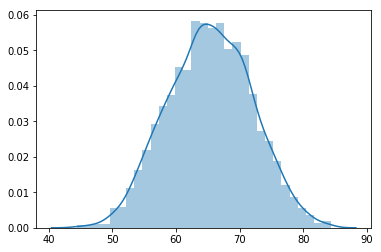

In [26]:
sns.distplot(duracion_proyectos)

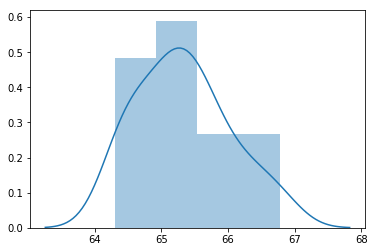

In [27]:
sns.distplot(duracion_proyectos_promedio_por_experimento)